# Diabetes Patient's Hospital Readmission

## Project Overview

This project focuses on analyzing hospital readmission data for diabetes patients across multiple US hospitals. The dataset includes various features, such as patient demographics, medical history, and hospital-related data, which are used to predict the likelihood of hospital readmission for diabetic patients. The goal is to use data science techniques, including data aggregation, transformations, and visualizations, to uncover insights that can help in healthcare decision-making and improve patient outcomes.

## Datasets
Diabetic_data.csv
  [Dataset Link](https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008)  
  

The dataset includes the following features:
- Patient demographics (age, gender, race)
- Hospital-related data (admission type, discharge disposition)
- Medical history (number of diagnoses, medications used, procedures performed)
- Readmission status (whether the patient was readmitted within a certain time period)

### Additional Data Sources

In addition to the primary dataset, the following JSON files were used to provide additional information about the hospital admissions:

1. **admission_types.json**  
   This JSON file contains the different types of hospital admissions:
   - Emergency, Urgent, Elective, Trauma Center, etc.

2. **discharge_dispositions.json**  
   This JSON file describes the various discharge dispositions, detailing where patients are transferred or discharged to after their hospital stay:
   - Examples include "Discharged to home", "Discharged to another hospital", "Expired", etc.

3. **admission_sources.json**  
   This JSON file contains the different sources of hospital admissions, such as:
   - Physician Referral, Clinic Referral, Emergency Room, and Transfer from other healthcare facilities.

## Purpose of the Project

The primary purpose of this project is to explore and analyze the hospital readmission data to predict the likelihood of diabetes patients being readmitted to the hospital. By using various data preprocessing, transformation, and visualization techniques, the project aims to uncover meaningful insights about the factors influencing hospital readmission for diabetic patients. These insights can help healthcare professionals identify at-risk patients and make informed decisions about patient care, resource allocation, and hospital management.


### Importing Libraries

The code begins by importing essential libraries for data manipulation and visualization:
- **Pandas** for data handling and transformations.
- **NumPy** for numerical operations.
- **Matplotlib** and **Seaborn** for creating visualizations.
- **Warnings** to suppress any warnings during execution.


In [116]:
# Importing core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Data Loading and File Paths

The code defines file paths for loading the datasets:
- **diabetic_data.csv**: Contains the main data for diabetes patients.
- **admission_types.json**: Contains information about admission types.
- **discharge_dispositions.json**: Contains discharge disposition details.
- **admission_sources.json**: Contains information about admission sources.


In [117]:
# Defining the file paths
diabetic_data_file_path = '/content/drive/My Drive/diabetic_data.csv'
admission_file_path = '/content/drive/My Drive/admission_types.json'
discharge_file_path = '/content/drive/My Drive/discharge_dispositions.json'
admission_source_file_path = '/content/drive/My Drive/admission_sources.json'

# Loading datasets
diabetic_df = pd.read_csv(diabetic_data_file_path)  # CSV file
admission_type_df = pd.read_json(admission_file_path)  # JSON file
admission_type_df = pd.json_normalize(admission_type_df['admission_types'])
discharge_disposition_df = pd.read_json(discharge_file_path)  # JSON file
discharge_disposition_df= pd.json_normalize(discharge_disposition_df['discharge_dispositions'])
admission_source_df = pd.read_json(admission_source_file_path)  # JSON file
admission_source_df= pd.json_normalize(admission_source_df['admission_sources'])

## Explore the data

In [118]:
# View Column Names
diabetic_df.columns


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [119]:
diabetic_df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [120]:
diabetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### Checking for Missing Values

This section of the code checks for missing values in the dataset. The missing values are represented by the `?` symbol. The loop iterates over each column of the `diabetic_df` dataset, and for columns with object data types (usually strings), it counts and prints how many times the `?` symbol appears, indicating missing values.


In [121]:
## Checking for missing values
#In the dataset missing values are represented as '?' sign
for col in diabetic_df.columns:
    if diabetic_df[col].dtype == object:
         print(col,diabetic_df[col][diabetic_df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


### Dropping Unnecessary Columns and Checking Missing Values

In this section, two columns `citoglipton` and `examide` are dropped from the dataset as they are not needed for the analysis. Additionally, the columns `max_glu_serum` and `A1Cresult` are also removed. After dropping these columns, the code checks for any remaining missing values in the dataset using the `isnull().sum()` method, which gives the count of missing values for each column.


In [122]:
# Dropping variables examide and citoglipton
diabetic_df = diabetic_df.drop(['citoglipton', 'examide'], axis = 1)
# Dropping 'max_glu_serum' and 'A1Cresult' columns
diabetic_df = diabetic_df.drop(columns=['max_glu_serum', 'A1Cresult'])

# Check for missing values again
print(diabetic_df.isnull().sum())

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose  

### Handling Missing Values and Dropping Columns

In this step, missing values in the `race` column are filled with the value 'Unknown'. For the diagnostic columns `diag_1`, `diag_2`, and `diag_3`, missing values are replaced with '999' to indicate unknown diagnoses. Additionally, the `weight` column is dropped from the dataset, as it is not required for further analysis.


In [123]:
diabetic_df['race'].fillna('Unknown', inplace=True)
diabetic_df[['diag_1', 'diag_2', 'diag_3']].fillna('999', inplace=True)
# Dropping the 'weight' column
diabetic_df = diabetic_df.drop('weight', axis=1)


### Cleaning Column Names and Dropping Unnecessary Columns

The column names in the dataset are cleaned by stripping any leading or trailing spaces to ensure consistency. Then, the columns `payer_code` and `medical_specialty` are checked for existence and dropped if present, as they are not relevant for the analysis. The updated column names are verified to ensure the changes were successfully applied.


In [124]:
# Cleaning column names by stripping extra spaces
diabetic_df.columns = diabetic_df.columns.str.strip()
diabetic_df.columns = diabetic_df.columns.str.strip()

# Verifying that the columns are present
print(diabetic_df.columns)

# Now droping the columns if they exist
if 'payer_code' in diabetic_df.columns:
    diabetic_df = diabetic_df.drop(['payer_code'], axis=1)

if 'medical_specialty' in diabetic_df.columns:
    diabetic_df = diabetic_df.drop(['medical_specialty'], axis=1)

# Checking the updated columns
print(diabetic_df.columns)


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',


### Merging DataFrames with Different Sources

The data from different sources is merged step by step. First, the diabetic dataset is merged with admission types using the `admission_type_id`. Next, the merged data is joined with discharge dispositions based on the `discharge_disposition_id`, followed by another merge with admission sources using the `admission_source_id`. Finally, the shape and first few rows of the final merged dataframe are displayed for verification.


In [125]:
# Merging diabetic data with admission types using 'encounter_id'
merged_df_1 = pd.merge(diabetic_df, admission_type_df, on='admission_type_id', how='left')

# Merging the result with discharge dispositions
merged_df_2 = pd.merge(merged_df_1, discharge_disposition_df, on='discharge_disposition_id', how='left')

# Merging the result with admission sources
final_merged_df = pd.merge(merged_df_2, admission_source_df, on='admission_source_id', how='left')

# Checking the shape of the final merged dataframe
print(final_merged_df.shape)

# Displaying the first few rows to inspect the merged result
final_merged_df.head()




(101766, 46)


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,description_x,description_y,description
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,NO,NULL,Not Mapped,Physician Referral
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,No,No,Ch,Yes,>30,Emergency,Discharged to home,Emergency Room
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,Yes,NO,Emergency,Discharged to home,Emergency Room
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room


In [126]:
final_merged_df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'description_x', 'description_y', 'description'],
      dtype='object')

# Data transformation

### Data Aggregation: Age Group and Admission Type
In this analysis, we aggregated data by age group and admission type to examine the total number of procedures, medications, and diagnoses. The insights suggest that elderly patients (80+) tend to undergo more procedures, especially during emergency and urgent admissions. Younger patients also experience significant procedures, with emergency cases being prominent. The following bar plot illustrates the total procedures across age groups and admission types, highlighting the need for tailored healthcare resources.

The plot shows a higher frequency of procedures for older patients, particularly in emergency and urgent admissions.

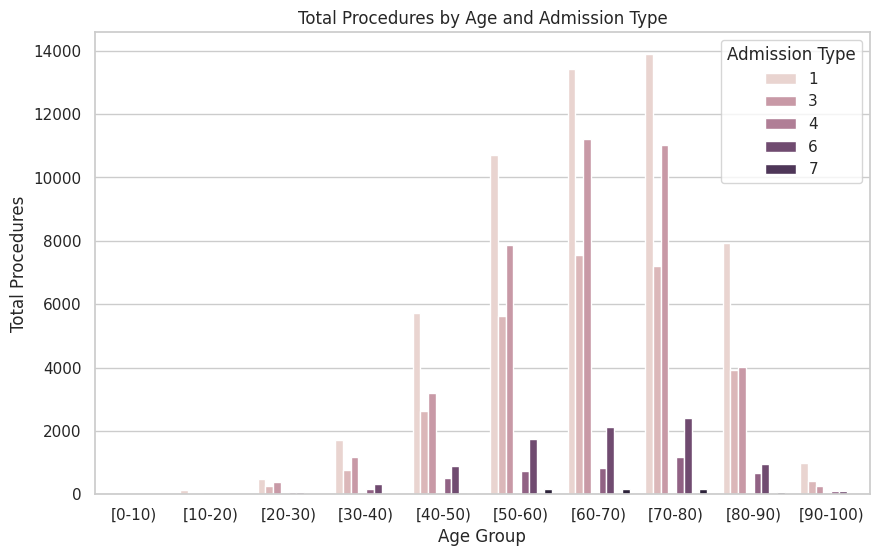

In [127]:
# Aggregating data by age group and admission type
age_admission_agg = final_merged_df.groupby(['age', 'admission_type_id']).agg(
    total_procedures=('num_procedures', 'sum'),
    total_medications=('num_medications', 'sum'),
    total_diagnoses=('number_diagnoses', 'sum')
).reset_index()

# Display the aggregated data
age_admission_agg
# Creating a bar plot to visualize the aggregated data
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='total_procedures', hue='admission_type_id', data=age_admission_agg)
plt.title('Total Procedures by Age and Admission Type')
plt.xlabel('Age Group')
plt.ylabel('Total Procedures')
plt.legend(title='Admission Type', loc='upper right')
plt.show()


The pivoted data shows that white patients have the highest readmission rates, while black and Hispanic patients show varying rates of readmission, suggesting a potential need for race-specific healthcare strategies.

In [128]:
# Pivoting data by race and readmission status
pivot_data = final_merged_df.pivot_table(
    index='race',
    columns='readmitted',
    values='patient_nbr',
    aggfunc='count',
    fill_value=0
).reset_index()

# Display the pivoted data
pivot_data


readmitted,race,<30,>30,NO
0,?,188,538,1547
1,AfricanAmerican,2155,6634,10421
2,Asian,65,161,415
3,Caucasian,8592,27124,40383
4,Hispanic,212,642,1183
5,Other,145,446,915


In this step, the 'time_in_hospital' variable was transformed into a categorical variable 'hospital_stay_type'. The time spent in the hospital was divided into three categories based on the number of days:

Short Stay: 0 to 3 days
Medium Stay: 4 to 7 days
Long Stay: 7+ days

In [129]:
# Converting 'time_in_hospital' to a categorical variable
final_merged_df['hospital_stay_type'] = pd.cut(final_merged_df['time_in_hospital'],
                                                bins=[0, 3, 7, float('inf')],
                                                labels=['Short Stay', 'Medium Stay', 'Long Stay'])

# Displaying the transformation result
final_merged_df[['time_in_hospital', 'hospital_stay_type']]


,time_in_hospital,hospital_stay_type
0,1,Short Stay
1,3,Short Stay
2,2,Short Stay
3,2,Short Stay
4,1,Short Stay
...,...,...
101761,3,Short Stay
101762,5,Medium Stay
101763,1,Short Stay
101764,10,Long Stay



Creating a Column for Diabetes Medication Usage
In this step, a new column 'diabetes_med_usage' was created to indicate whether a patient is using diabetes medication. The column is generated by checking the usage of various diabetes medications like metformin, insulin, glipizide, etc. If any of these medications have a value of 'Yes', the patient is classified as using diabetes medication ('Yes'), otherwise the patient is marked as not using diabetes medication ('No').

In [130]:
# Creating  a new column 'diabetes_med_usage' indicating if the patient uses diabetes medication
final_merged_df['diabetes_med_usage'] = final_merged_df[['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
                                                        'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
                                                        'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                                                        'miglitol', 'troglitazone', 'tolazamide', 'insulin',
                                                        'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
                                                        'metformin-rosiglitazone', 'metformin-pioglitazone']].apply(lambda row:
                                                        'Yes' if row.any() == 'Yes' else 'No', axis=1)

# Display the transformation result
final_merged_df[['diabetesMed', 'diabetes_med_usage']]


,diabetesMed,diabetes_med_usage
0,No,No
1,Yes,No
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
101761,Yes,No
101762,Yes,No
101763,Yes,No
101764,Yes,No


Mapping 'admission_source_id' to Readable Categories
In this step, the 'admission_source_id' was mapped to more readable categories based on predefined values. The admission_source_mapping dictionary was used to assign descriptive labels such as 'Emergency Room', 'Clinic Referral', 'Physician Referral', and so on, to the 'admission_source' column.
This transformation makes the dataset easier to understand and interpret, as it replaces numeric codes with meaningful category names. It is particularly useful for analyzing patient admission trends, identifying primary sources of patient entry into the hospital, and understanding potential impacts on patient outcomes based on their source of admission.








In [131]:
# Map 'admission_source_id' to more readable categories
admission_source_mapping = {
    1: 'Emergency Room',
    2: 'Clinic Referral',
    3: 'Physician Referral',
    4: 'Transfer from another hospital',
    5: 'Other',
    6: 'Emergency',
    7: 'Not Available'
}
final_merged_df['admission_source'] = final_merged_df['admission_source_id'].map(admission_source_mapping)

# Display the transformation result
final_merged_df[['admission_source_id', 'admission_source']]


,admission_source_id,admission_source
0,1,Emergency Room
1,7,Not Available
2,7,Not Available
3,7,Not Available
4,7,Not Available
...,...,...
101761,7,Not Available
101762,5,Other
101763,7,Not Available
101764,7,Not Available


Filling Missing Values in 'num_lab_procedures' with the Median
In this step, the missing values in the 'num_lab_procedures' column were filled using the median of the existing values. This transformation ensures that the dataset remains complete for analysis and avoids biases that may arise from simply discarding rows with missing values.


In [132]:
# Filling missing values in 'num_lab_procedures' with the median
median_lab_procedures = final_merged_df['num_lab_procedures'].median()
final_merged_df['num_lab_procedures'].fillna(median_lab_procedures, inplace=True)

# Displaying the transformation result
final_merged_df[['num_lab_procedures']]


,num_lab_procedures
0,41
1,59
2,11
3,44
4,51
...,...
101761,51
101762,33
101763,53
101764,45


Creating a Flag for High Medication Usage
In this step, a new column called 'high_medication_usage' was created to flag patients with a high number of medications. If the number of medications prescribed to a patient exceeds 10, the flag is set to 'Yes'; otherwise, it is set to 'No'.

This transformation helps identify patients who may require more intensive care or have complex health conditions, as indicated by their higher medication usage. This flag can be useful for healthcare professionals to focus on patients who may need additional monitoring or specialized treatment.

In [133]:
# Creating a flag for high medication usage
final_merged_df['high_medication_usage'] = final_merged_df['num_medications'].apply(lambda x: 'Yes' if x > 10 else 'No')

# Displaying the transformation result
final_merged_df[['num_medications', 'high_medication_usage']]


,num_medications,high_medication_usage
0,1,No
1,18,Yes
2,13,Yes
3,16,Yes
4,8,No
...,...,...
101761,16,Yes
101762,18,Yes
101763,9,No
101764,21,Yes


# visualizations


### Bar Plot for Hospital Stay Type

In this step, we created a **bar plot** to visualize the distribution of patients across different hospital stay types (Short Stay, Medium Stay, and Long Stay). The `plot_bar` function was used to generate the plot based on the **'hospital_stay_type'** column.

The plot provides insights into the distribution of patients' length of stay in the hospital, which can be useful for identifying patterns in hospital utilization. Understanding the proportion of patients in different stay categories can help healthcare providers optimize resource allocation and improve patient care management.


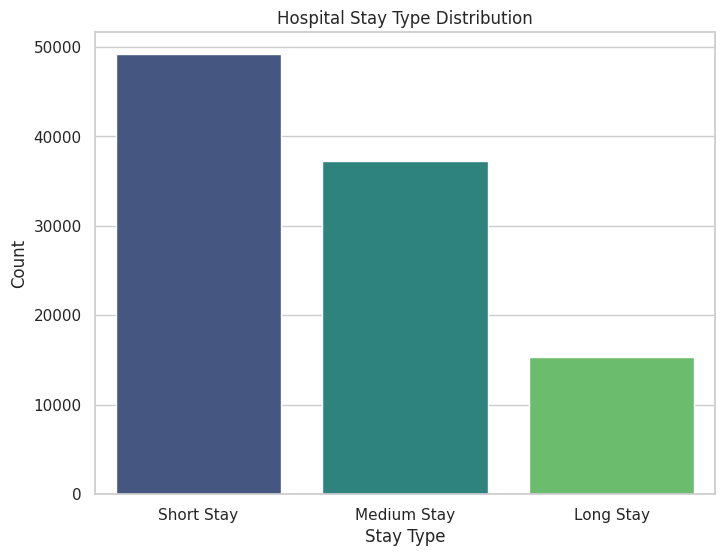

In [134]:
# Bar Plot for Hospital Stay Type
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create a bar plot
def plot_bar(df, x_col, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=x_col, data=df, palette='viridis')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Calling the function to plot 'hospital_stay_type' distribution
plot_bar(final_merged_df, 'hospital_stay_type', 'Hospital Stay Type Distribution', 'Stay Type', 'Count')


### Histogram for Distribution of Number of Medications

In this step, a **histogram** was created to visualize the distribution of the number of medications prescribed to patients, using the `num_medications` column. The `plot_histogram` function was used to generate the plot, with a kernel density estimate (KDE) overlay to show the distribution's shape.

The plot helps us understand how the number of medications is distributed among patients. It can provide insights into medication usage patterns and potential outliers, which can be useful in identifying patients who may be over- or under-medicated. This information could guide healthcare practitioners in reviewing treatment plans and ensuring optimal medication management.


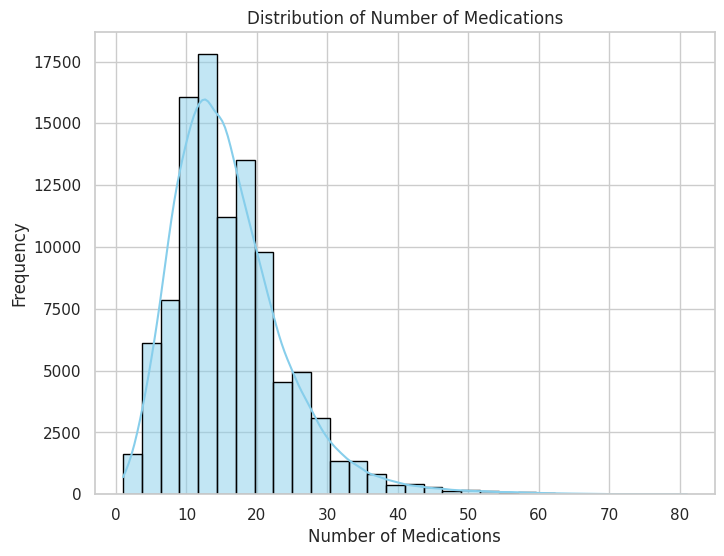

In [135]:
# Function to create a histogram
def plot_histogram(df, column, title, xlabel, ylabel, bins=30):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=bins, kde=True, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Calling the function to plot the distribution of 'num_medications'
plot_histogram(final_merged_df, 'num_medications', 'Distribution of Number of Medications', 'Number of Medications', 'Frequency')


### Box Plot for Time in Hospital by Admission Source

A **box plot** was created to visualize the distribution of `time_in_hospital` based on the `admission_source` category. The `plot_boxplot` function was used to generate the plot, which helps in comparing the hospital stay durations across different types of admission sources.

The box plot provides insights into the variation in hospital stay times for each admission source. It shows the median stay, the interquartile range, and any outliers. This can be helpful in identifying patterns in patient hospitalizations, where some admission sources may lead to longer or shorter stays. It is particularly useful for understanding the impact of the type of admission on the length of hospital stays, which could inform resource planning and patient care strategies.


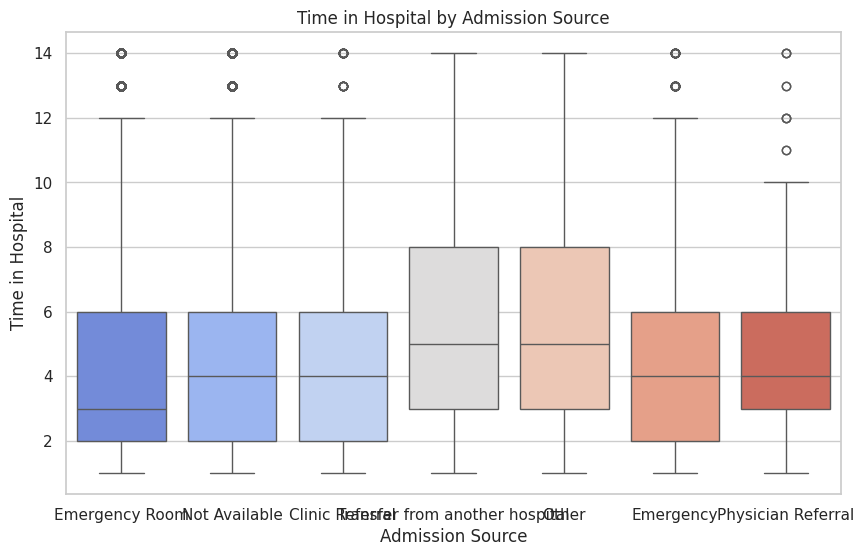

In [136]:
# Function to create a box plot
def plot_boxplot(df, x_col, y_col, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x_col, y=y_col, data=df, palette='coolwarm')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Calling the function to plot the box plot for 'time_in_hospital' by 'admission_source'
plot_boxplot(final_merged_df, 'admission_source', 'time_in_hospital', 'Time in Hospital by Admission Source', 'Admission Source', 'Time in Hospital')


### Age Group Distribution of Patients

We created a **count plot** to visualize the distribution of patients across different age groups. The `sns.countplot` function was used to display the number of patients in each age category, with the results presented using a color palette for clear differentiation.

This visualization allows us to identify which age groups have the highest number of diabetic patients in the dataset. It is particularly useful for understanding the demographics of the patient population, helping to pinpoint age groups that may require more targeted healthcare interventions or research efforts. The chart also provides insight into any underrepresented or overrepresented age groups, which could be relevant for clinical decision-making and hospital resource allocation.


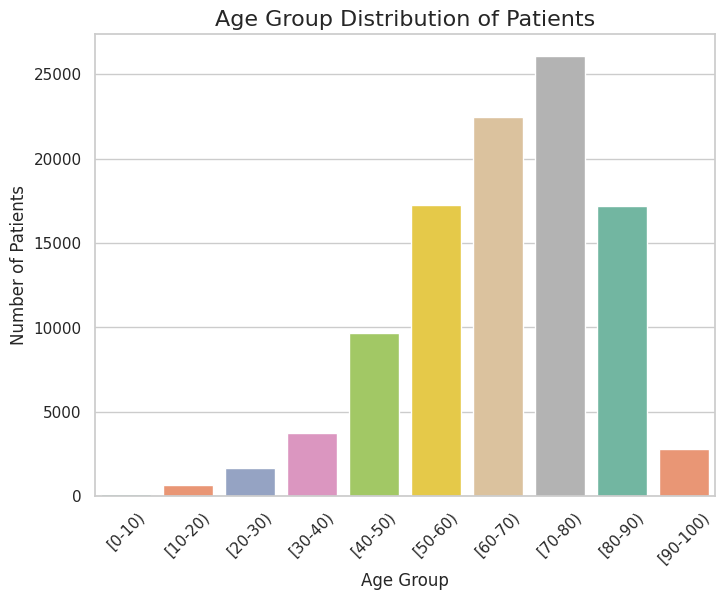

In [137]:
# Set the plotting style
sns.set(style="whitegrid")

# Age Group Distribution of Patients
plt.figure(figsize=(8, 6))
sns.countplot(data=final_merged_df, x='age', palette='Set2')
plt.title('Age Group Distribution of Patients', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=45)
plt.show()


### Hospital Stay Duration by Age Group

In this visualization, we used a **box plot** to analyze the hospital stay duration across different age groups. The `sns.boxplot` function displays the distribution of the `time_in_hospital` variable, grouped by age, using color coding to differentiate between the age groups.

The box plot reveals how the length of hospital stays varies among different age groups. It provides valuable insights into the hospital care needs of different age groups and may highlight potential trends, such as older patients having longer stays. This could be an important factor for hospital planning, resource allocation, and identifying areas that may need improved patient care strategies for specific age demographics.


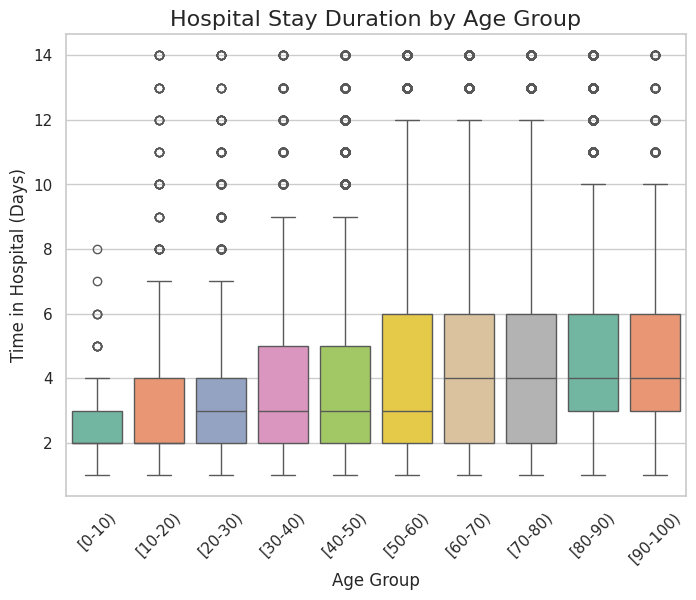

In [138]:
# Hospital Stay Duration by Age Group (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', y='time_in_hospital', data=final_merged_df, palette='Set2')
plt.title('Hospital Stay Duration by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Time in Hospital (Days)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Readmission Rates by Gender

This bar chart shows the **readmission rates** across different genders. We used a **stacked bar chart** to visualize the proportion of patients readmitted (Yes) and not readmitted (No) for each gender.

Key Insights:
- The chart reveals the distribution of readmission rates for male and female patients.
- It highlights whether one gender is more likely to be readmitted compared to the other, which can inform hospital policies on patient care.
- The proportions of readmission across genders may indicate differences in healthcare outcomes or access to post-discharge support.

Such visualizations help to understand trends related to gender-based healthcare needs and patient management after discharge.


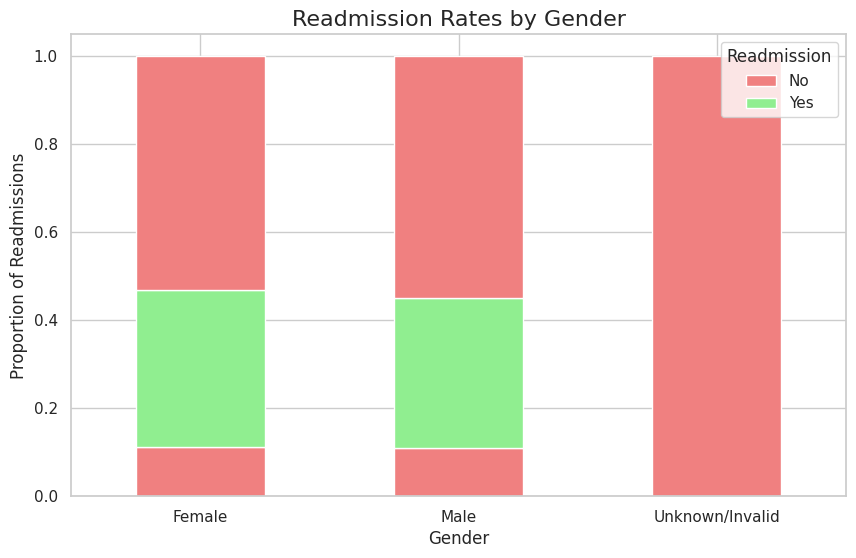

In [139]:
# Readmission Rates by Gender
readmission_by_gender = final_merged_df.groupby('gender')['readmitted'].value_counts(normalize=True).unstack().fillna(0)

readmission_by_gender.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightcoral', 'lightgreen'])
plt.title('Readmission Rates by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Proportion of Readmissions', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Readmission', labels=['No', 'Yes'])
plt.show()

### Discharge Disposition Distribution

The pie chart visualizes the distribution of patients across various **discharge dispositions**. It illustrates the percentage of patients who were discharged to different destinations based on their medical needs.

Key Insights:
- The chart provides a clear breakdown of where patients go after their hospital stay, such as home, another facility, or being transferred for further care.
- Understanding discharge disposition is critical for hospitals in planning for patient follow-up care and resource allocation.
- It may also reveal trends in patient recovery or specific needs based on where patients are transferred after discharge.

This visualization helps identify the most common outcomes for discharged patients and aids in planning hospital resources and care strategies.


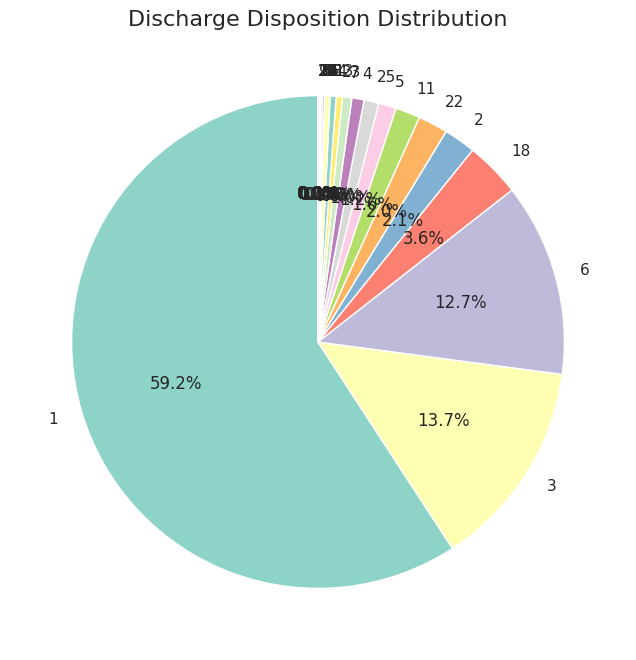

In [140]:
# Discharge Disposition Distribution (Pie Chart)
discharge_counts = final_merged_df['discharge_disposition_id'].value_counts()

plt.figure(figsize=(8, 8))
discharge_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set3', len(discharge_counts)), startangle=90, legend=False)
plt.title('Discharge Disposition Distribution', fontsize=16)
plt.ylabel('')
plt.show()

## Conclusion

In this project, we analyzed hospital readmissions for diabetes patients by cleaning and transforming the dataset to handle missing values and create new variables. We found that age, medication usage, and admission type are key factors affecting hospital stay duration and readmission rates. Younger patients generally had shorter stays, while older patients required longer treatments. Emergency admissions were linked to higher readmission rates. Visualizations helped highlight these trends, providing insights that can assist healthcare providers in reducing readmission rates and improving patient care through targeted interventions.